# goal
* play with mini-rocket to see what we can do
    * https://arxiv.org/abs/2012.08791
    * https://www.youtube.com/watch?v=FrKxFc1sN1w
    * https://towardsdatascience.com/minirocket-fast-er-and-accurate-time-series-classification-cdacca2dcbfa
* use this dataset. 
    https://www.kaggle.com/keplersmachines/kepler-labelled-time-series-data

In [1]:
from pathlib import Path
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
# import matplotlib.pyplot as plt
import seaborn as sn
from sktime.transformations.panel.rocket import MiniRocket  # import RandomOverSampler #.series_as_features.rocket import MiniRocket

C:\Users\garla\anaconda3\envs\tutorial3\lib\site-packages\sktime\datatypes\_series\_check.py:43: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_INDEX_TYPES = (pd.Int64Index, pd.RangeIndex, pd.PeriodIndex, pd.DatetimeIndex)
C:\Users\garla\anaconda3\envs\tutorial3\lib\site-packages\sktime\datatypes\_hierarchical\_check.py:50: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_INDEX_TYPES = (pd.Int64Index, pd.RangeIndex, pd.PeriodIndex, pd.DatetimeIndex)
C:\Users\garla\anaconda3\envs\tutorial3\lib\site-packages\sktime\datatypes\_hierarchical\_check.py:51: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_MULTIINDEX_TYPES = (pd.Int64Index, pd.RangeIndex)
C:\Use

In [19]:
from sklearn.linear_model import RidgeClassifierCV
import numpy as np

In [2]:
p = Path.home() / "Downloads/archive"
train_csv = p / 'exoTrain.csv'
test_csv = p/ "exoTest.csv"

In [3]:
Path.home()

WindowsPath('C:/Users/garla')

In [4]:
dftrain = pd.read_csv(train_csv)

dftest = pd.read_csv(test_csv)

In [5]:
# dftrain.head()
dftrain.shape

(5087, 3198)

In [6]:
dftest.shape

(570, 3198)

In [7]:
ytrain = dftrain.LABEL.to_numpy()
ytest = dftest.LABEL.to_numpy()

In [8]:
dftrain2 = dftrain.drop(columns = "LABEL")
dftest2 = dftest.drop(columns = "LABEL")


In [9]:
dftrain2.shape, dftest2.shape
dftrain2 = dftrain2.to_numpy()
dftest2 = dftest2.to_numpy()

<AxesSubplot:ylabel='count'>

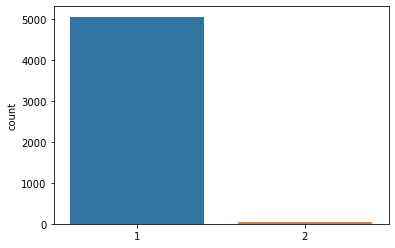

In [10]:
# plt.hist(ytrain, bins = 2)
sn.countplot(x=ytrain)

In [11]:
ytrain

array([2, 2, 2, ..., 1, 1, 1], dtype=int64)

In [12]:
os = RandomOverSampler()
x_train3, y_train3 = os.fit_resample(dftrain2, ytrain)

In [13]:
x_train3.shape, y_train3.shape

((10100, 3197), (10100,))

<AxesSubplot:ylabel='count'>

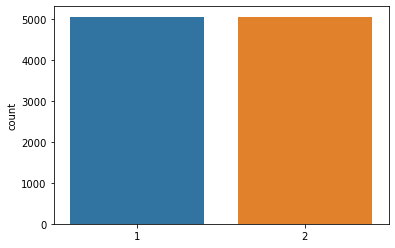

In [14]:
sn.countplot(x=y_train3)

In [ ]:
from sklearn.pipeline import make_pipeline

In [15]:
minirocket = MiniRocket()

In [16]:
x_train_4 = minirocket.fit_transform(x_train3)

In [20]:
classifier = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10), normalize=True)
model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

In [ ]:
classifier.fit(x_train_4, y_train3)

C:\Users\garla\anaconda3\envs\tutorial3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
